In [1]:
import seaborn as sns
import pandas as pd

In [2]:
mpg=pd.read_csv('mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [5]:
df_mpg=mpg.groupby('drv',as_index=False).agg(mean_hwy=('hwy','mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

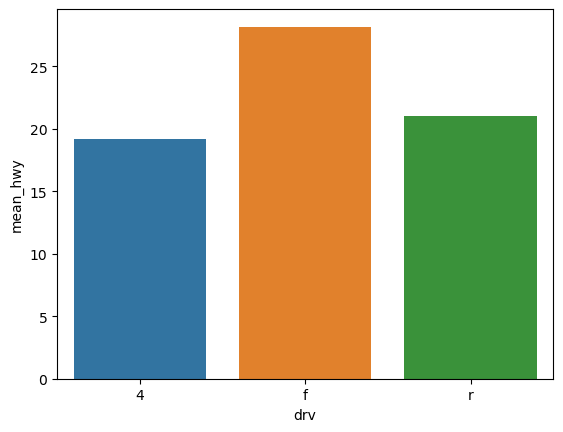

In [7]:
sns.barplot(data=df_mpg,x='drv',y='mean_hwy',hue='drv')

In [8]:
df_mpg=df_mpg.sort_values('mean_hwy',ascending=False)

In [9]:
df_mpg

,drv,mean_hwy
1,f,28.160377
2,r,21.000000
0,4,19.174757


<Axes: xlabel='drv', ylabel='mean_hwy'>

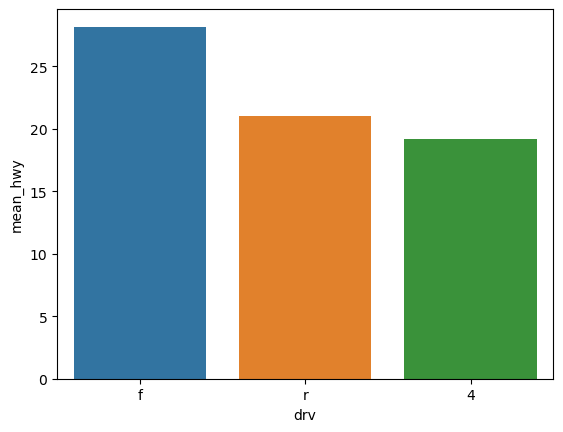

In [10]:
sns.barplot(data=df_mpg,x='drv',y='mean_hwy',hue='drv')

In [11]:
df_mpg=mpg.groupby('drv',as_index=False).agg(n=('drv','count'))   #구동 방식 별 빈도
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='n'>

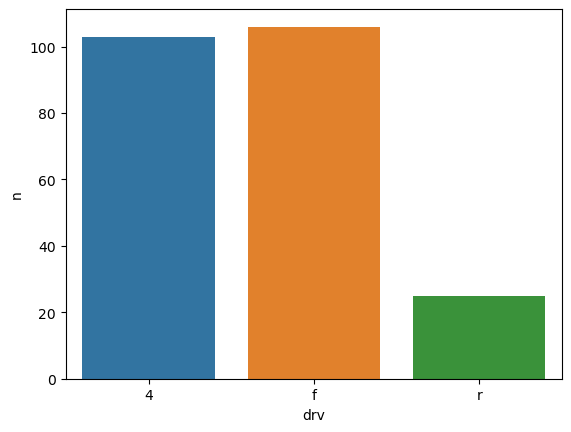

In [12]:
sns.barplot(data=df_mpg,x='drv',y='n',hue='drv')   #a막대그래프 만들기

<Axes: xlabel='drv', ylabel='count'>

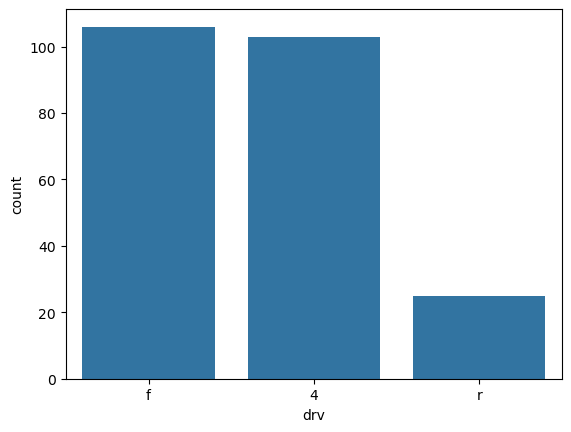

In [13]:
sns.countplot(data=mpg,x='drv')

In [14]:
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

In [15]:
df_mpg['drv'].unique()

array(['4', 'f', 'r'], dtype=object)

<Axes: xlabel='drv', ylabel='count'>

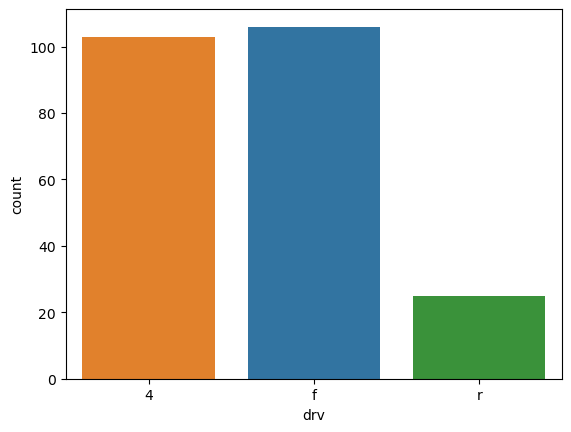

In [18]:
sns.countplot(data=mpg,x='drv',order=['4','f','r'],hue='drv')

In [20]:
mpg['drv'].value_counts().index  #drv의 값을 빈도가 높은 순으로 출력

Index(['f', '4', 'r'], dtype='object', name='drv')

<Axes: xlabel='drv', ylabel='count'>

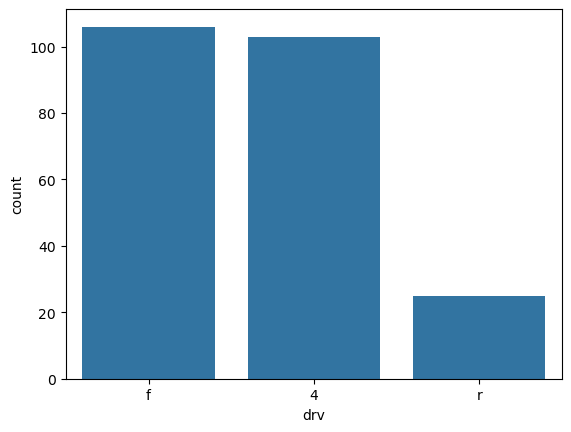

In [21]:
#drv 빈도 높은 순으로 막대 정렬
sns.countplot(data=mpg,x='drv',order=mpg['drv'].value_counts().index)

In [22]:
#혼자해보기

In [ ]:
#1번

In [26]:
mpg.query('category=="suv"').groupby('cty',as_index=False).agg(mean_cty=('cty','mean'))

,cty,mean_cty
0,9,9.0
1,11,11.0
2,12,12.0
3,13,13.0
4,14,14.0
5,15,15.0
6,16,16.0
7,17,17.0
8,18,18.0
9,19,19.0


In [39]:
cty_mpg=mpg.query('category=="suv"').groupby('manufacturer',as_index=False).agg(mean_cty=('cty','mean')).sort_values('mean_cty',ascending=False).head()
cty_mpg

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<Axes: xlabel='manufacturer', ylabel='mean_cty'>

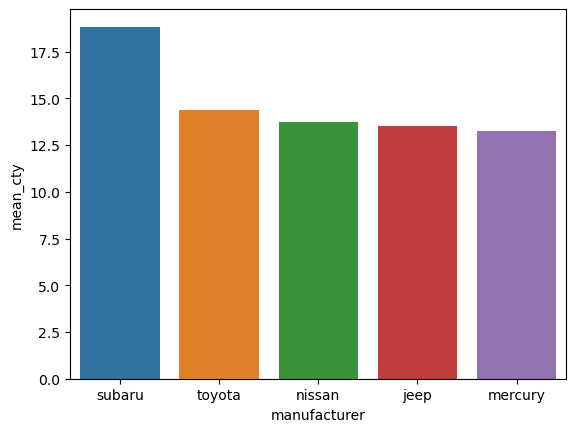

In [40]:
sns.barplot(data=cty_mpg,x='manufacturer',y='mean_cty',hue='manufacturer')

In [41]:
#2번

In [43]:
mpg_category=mpg.groupby('category',as_index=False).agg(c=('category','count')).sort_values('c',ascending=False)
mpg_category

,category,c
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


<Axes: xlabel='category', ylabel='c'>

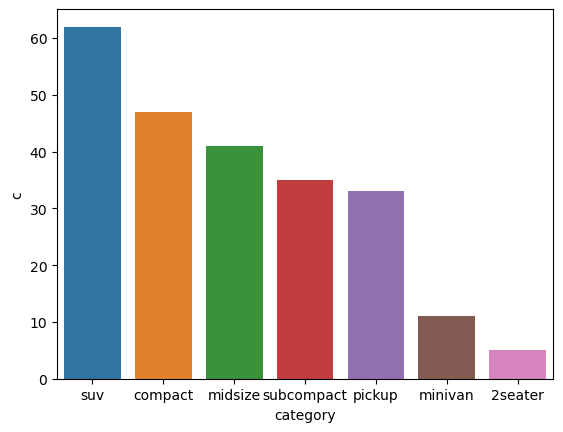

In [45]:
sns.barplot(data=mpg_category,x='category',y='c',hue='category')